In [16]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

# Reading the Image with Colour

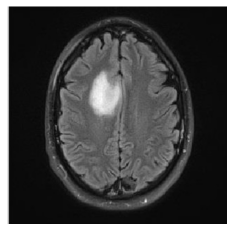

In [17]:
orig_img = cv2.imread("/Users/jaineet/yes/Y8.jpg",1)
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Converting the image to grayscale

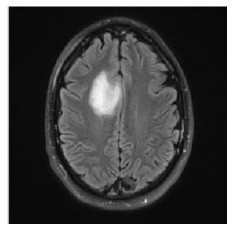

In [18]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

# Removing the salt and pepper noise using a 5x5 kernel median filter

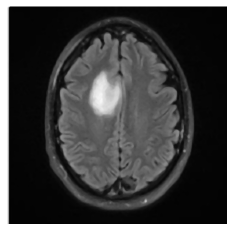

In [19]:
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.show()

# Detecting the edges using 3x3 Sobel Filters

Gx 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gy 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


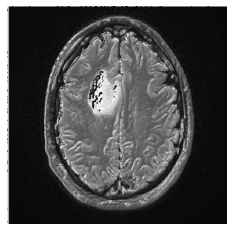

In [20]:
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print("Gx \n", Gx)
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print("Gy \n", Gy)

img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)

img_sobel = img_sobelx + img_sobely+gray_img
plt.imshow(img_sobel,cmap='gray')
plt.axis('off')
plt.show()

# Thresholding the pixel intensity values to locate the tumour

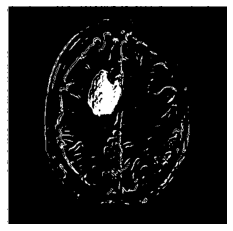

In [21]:
threshold = 170
maxValue = 255
 
th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

# Removing any minute white noises in the image using morphological opening

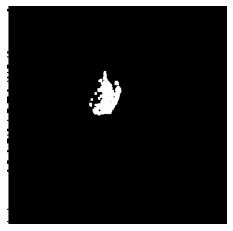

In [22]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening,cmap='gray')
plt.axis('off')
plt.show()

# Dilating the image to increase the object boundary to background

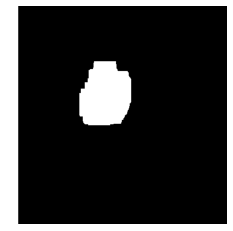

In [23]:
sure_bg = cv2.dilate(opening,kernel,iterations=20)

plt.imshow(sure_bg,cmap='gray')
plt.axis('off')
plt.show()

# Identifying the sure foreground area

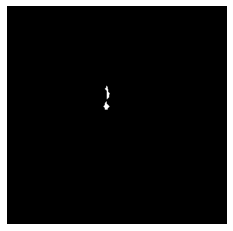

In [24]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg,cmap='gray')
plt.axis('off')
plt.show()

# Identifying the regions which we do not know if they are foreground or background.

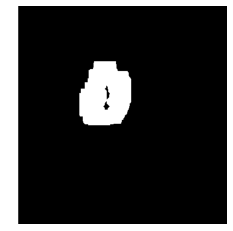

In [25]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown,cmap='gray')
plt.axis('off')
plt.show()

# Watershed Segmentation

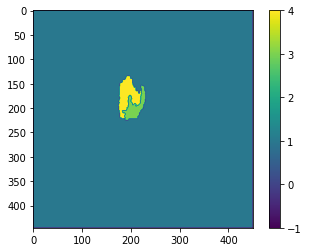

In [26]:
contours, hierarchy = cv2.findContours(sure_fg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

marker = np.zeros((gray_img.shape[0], gray_img.shape[1]),dtype = np.int32)

marker = np.int32(sure_fg) + np.int32(sure_bg)

for id in range(len(contours)):
    cv2.drawContours(marker,contours,id,id+2, -1)

marker = marker + 1

marker[unknown==255] = 0

copy_img = orig_img.copy()

cv2.watershed(copy_img, marker)

imgplt = plt.imshow(marker)
plt.colorbar()
plt.show()

# Marking the watershedded region in the original image thus segmenting the tumour

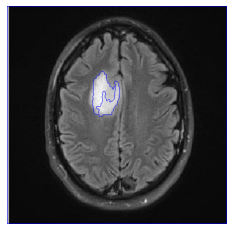

In [27]:
copy_img[marker==-1]=(0,0,255)
cv2.imwrite('img.jpg',copy_img)
plt.imshow(copy_img,cmap='gray')
plt.axis('off')
plt.show()

# Highlighting the tumour region using Morphological Operations - Erosion and Dilation

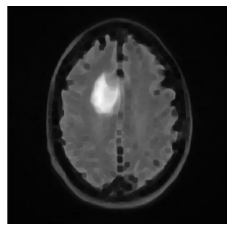

In [28]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
erosion = cv2.morphologyEx(median_filtered, cv2.MORPH_ERODE, kernel)
plt.imshow(erosion,cmap='gray')
plt.axis('off')
plt.show()

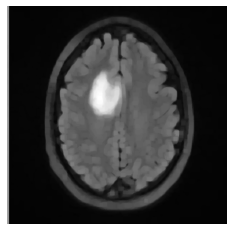

In [29]:
dilation = cv2.morphologyEx(erosion, cv2.MORPH_DILATE, kernel)
plt.imshow(dilation,cmap='gray')
plt.axis('off')
plt.show()